# `pseudo_electrostatic_packing`
This is a form of random sequential addition (`rsa`) where spheres are inserted as close to the specified points as possible without overlapping.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
ps.visualization.set_mpl_style()

## `im`
The image into which the spheres should be inserted.  Spheres will be inserted into the `False` locations. If `sites` is not specified, then the spheres will be clustered around the center of the image.

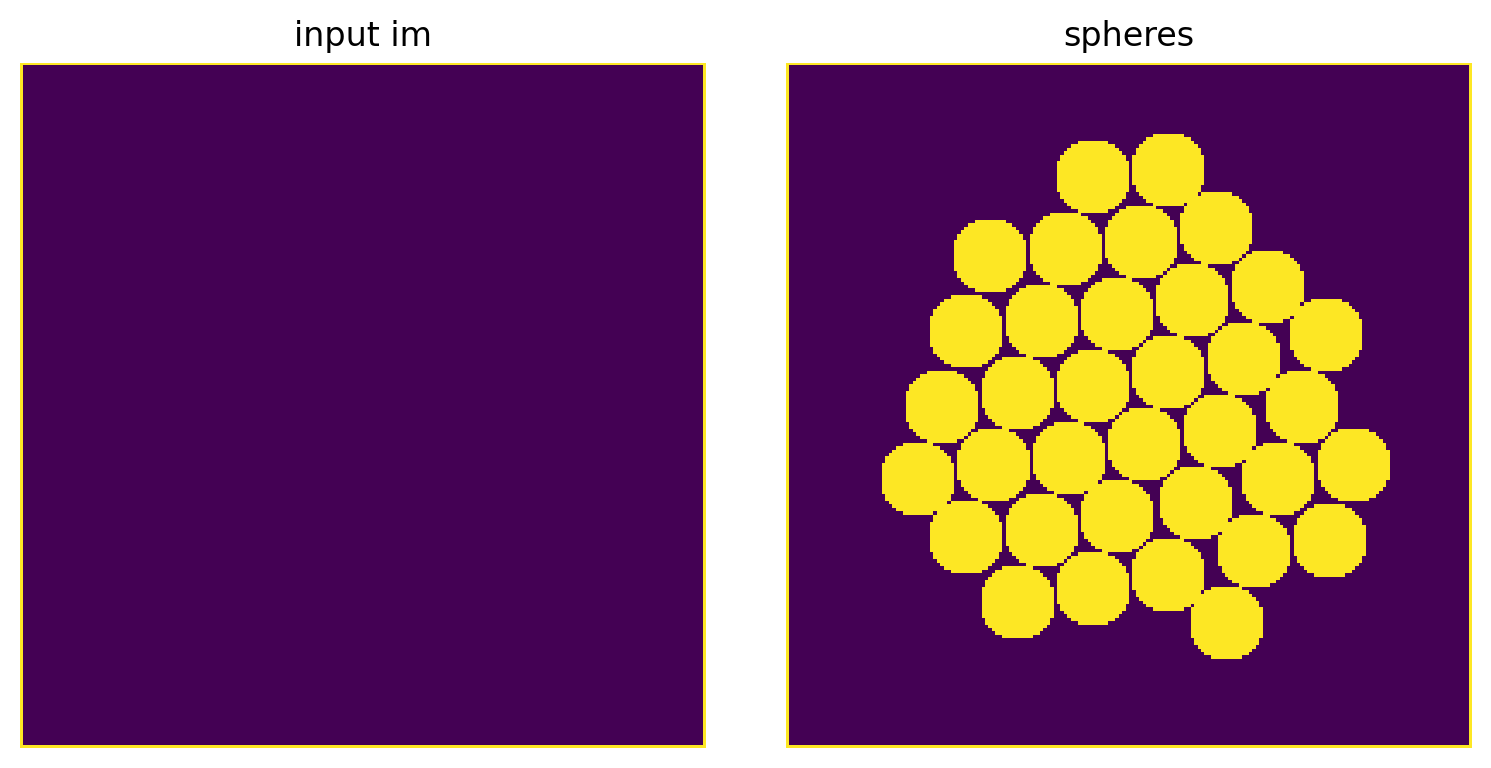

In [3]:
im = ps.generators.borders(shape=[200, 200], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, maxiter=35)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title("input im")
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title("spheres");

## `sites`
A boolean array with ``True`` values indicating the points where spheres are 'electrostatically' drawn to.  If not given, the function performs a distance transform of the image and uses all peaks.

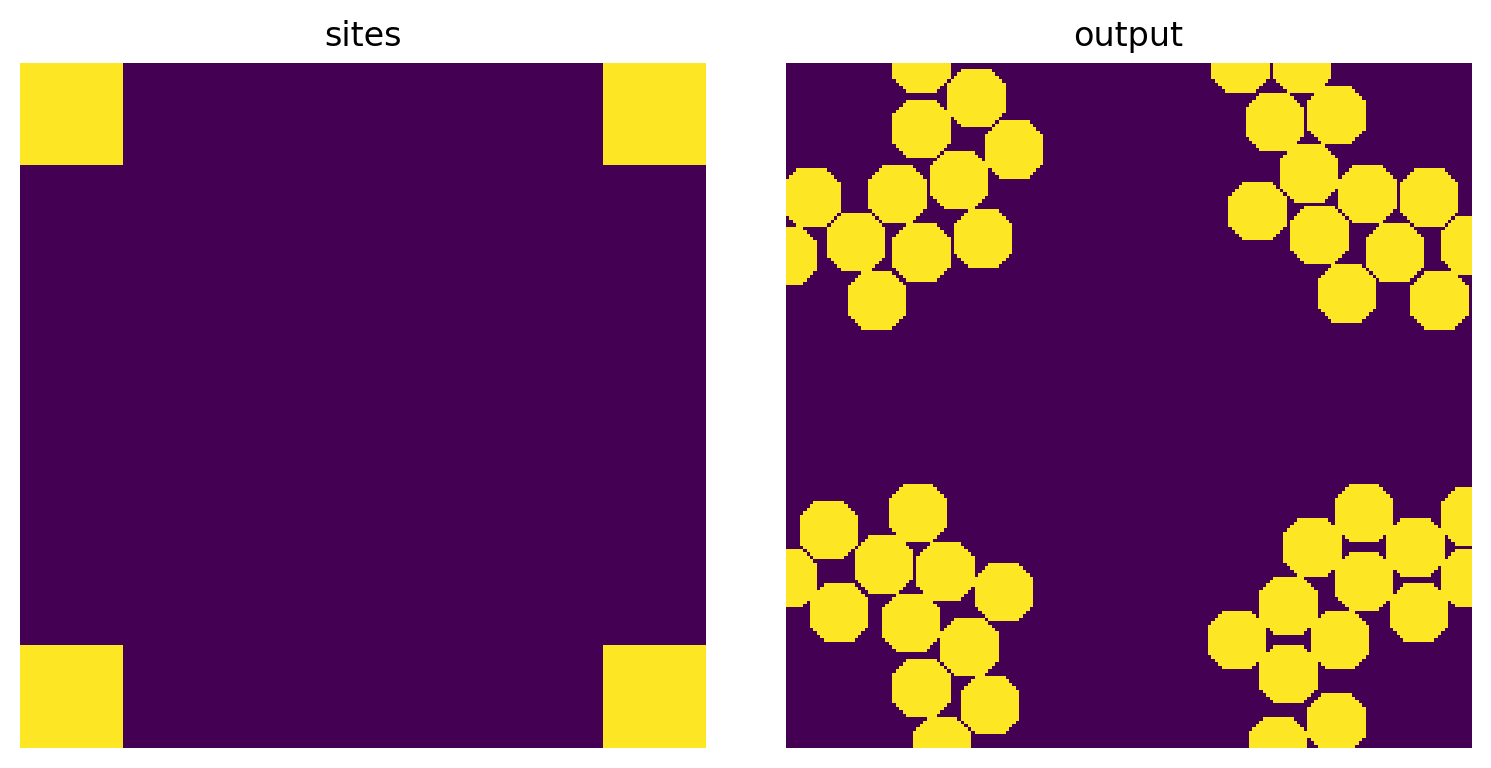

In [5]:
sites = ps.generators.borders(shape=[200, 200], mode='corners', thickness=30)
im = np.zeros_like(sites, dtype=bool)
packing = ps.generators.pseudo_electrostatic_packing(im=im, sites=sites, r=8, maxiter=50)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(sites, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title("sites")
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title("output");

## `r`
The radius of the spheres to add:

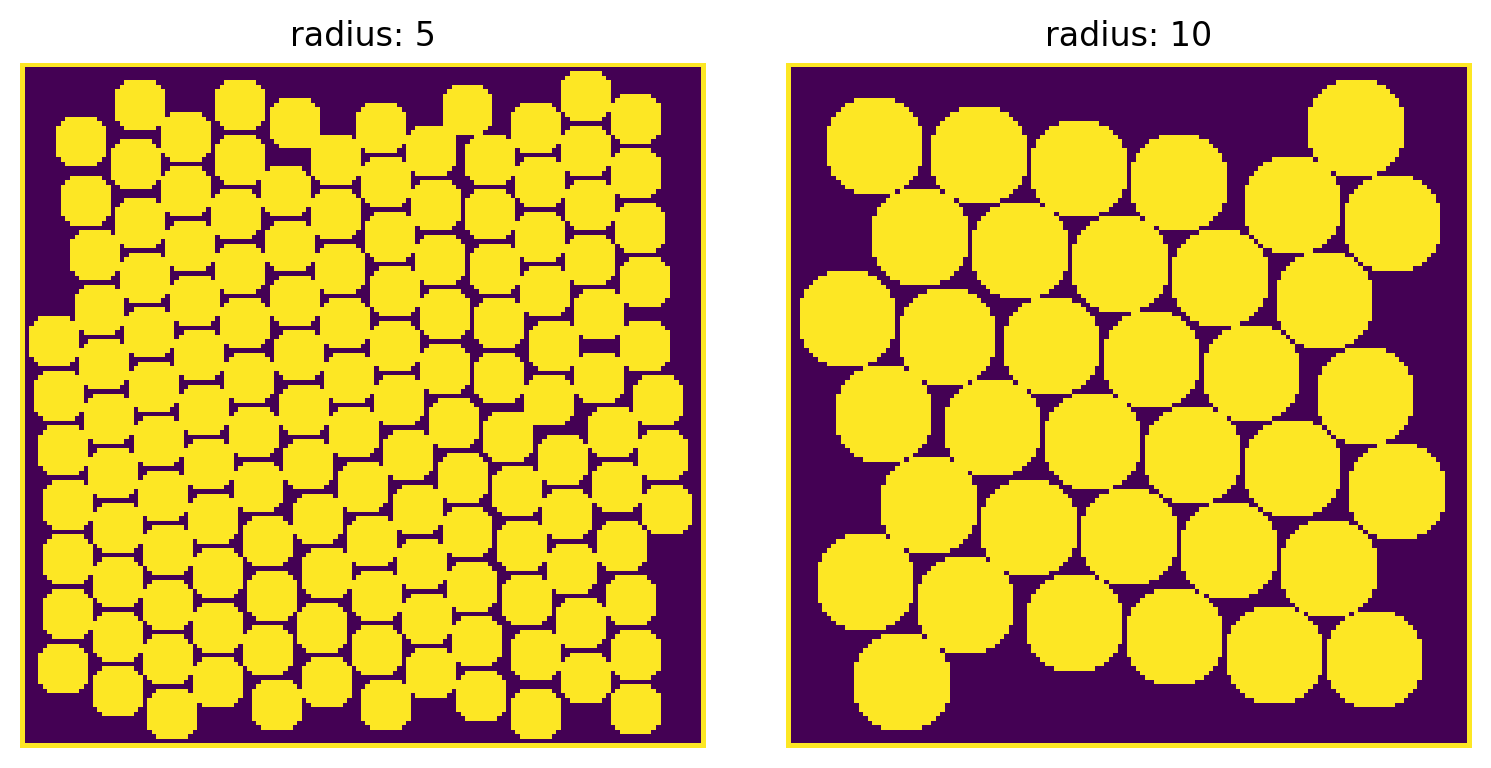

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

r = 5
im = ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title(f"radius: {r}")

r = 10
im = ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title(f"radius: {r}");

## `clearance`
The spheres can be forced to have some spacing between them by setting ``clearance > 0``, or they can overlap if ``clearance < 0``:

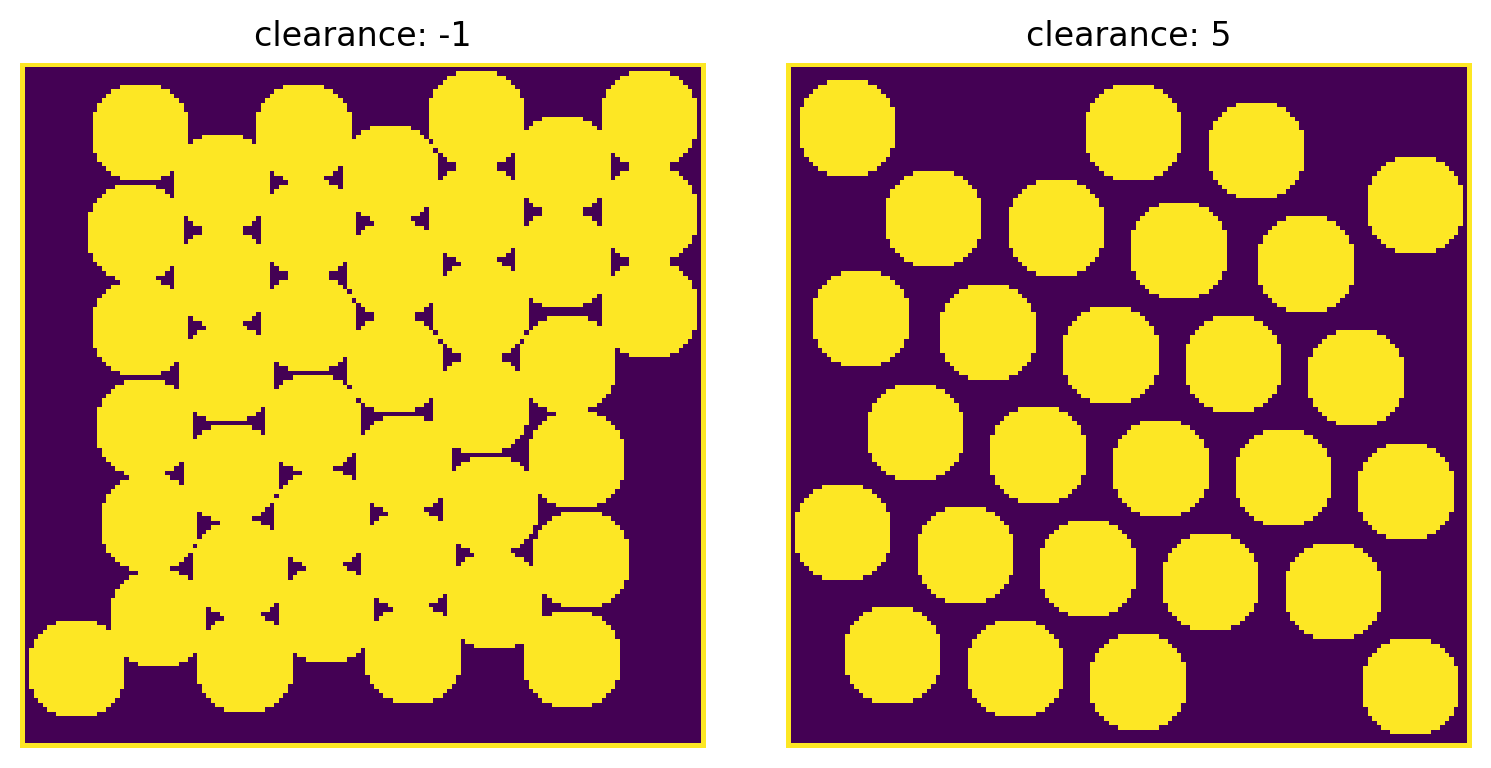

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

clearance=-1
im = ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r, clearance=clearance)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title(f'clearance: {clearance}')

clearance=5
im = ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r, clearance=clearance)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title(f'clearance: {clearance}');

## `protrusion` 
One of the uses of this function is to insert spheres like carbon particles into a matrix, like polymer.  In these cases it may be desirable to have the spheres protrude slightly.

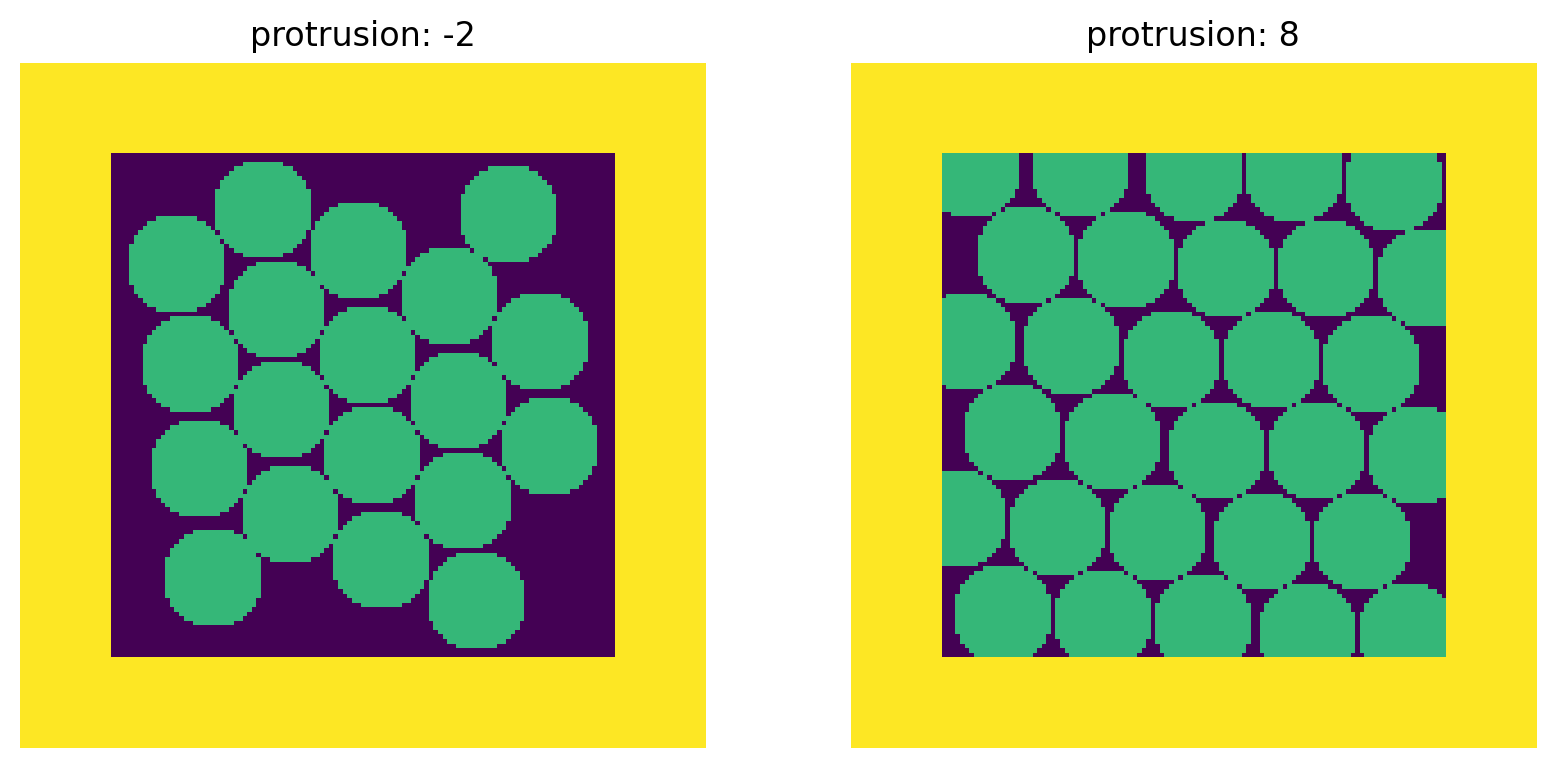

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[10, 4])

protrusion = -2
im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=20)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, protrusion=protrusion)
ax[0].imshow(packing + 0.5*im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title(f"protrusion: {protrusion}")

protrusion = 8
im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=20)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, protrusion=protrusion)
ax[1].imshow(packing + 0.5*im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title(f"protrusion: {protrusion}");

## `maxiter`
The maximum number of spheres to add.  Limiting this number can ensure the process does not take too long if the image is large, as well allow for partial filling of the image.

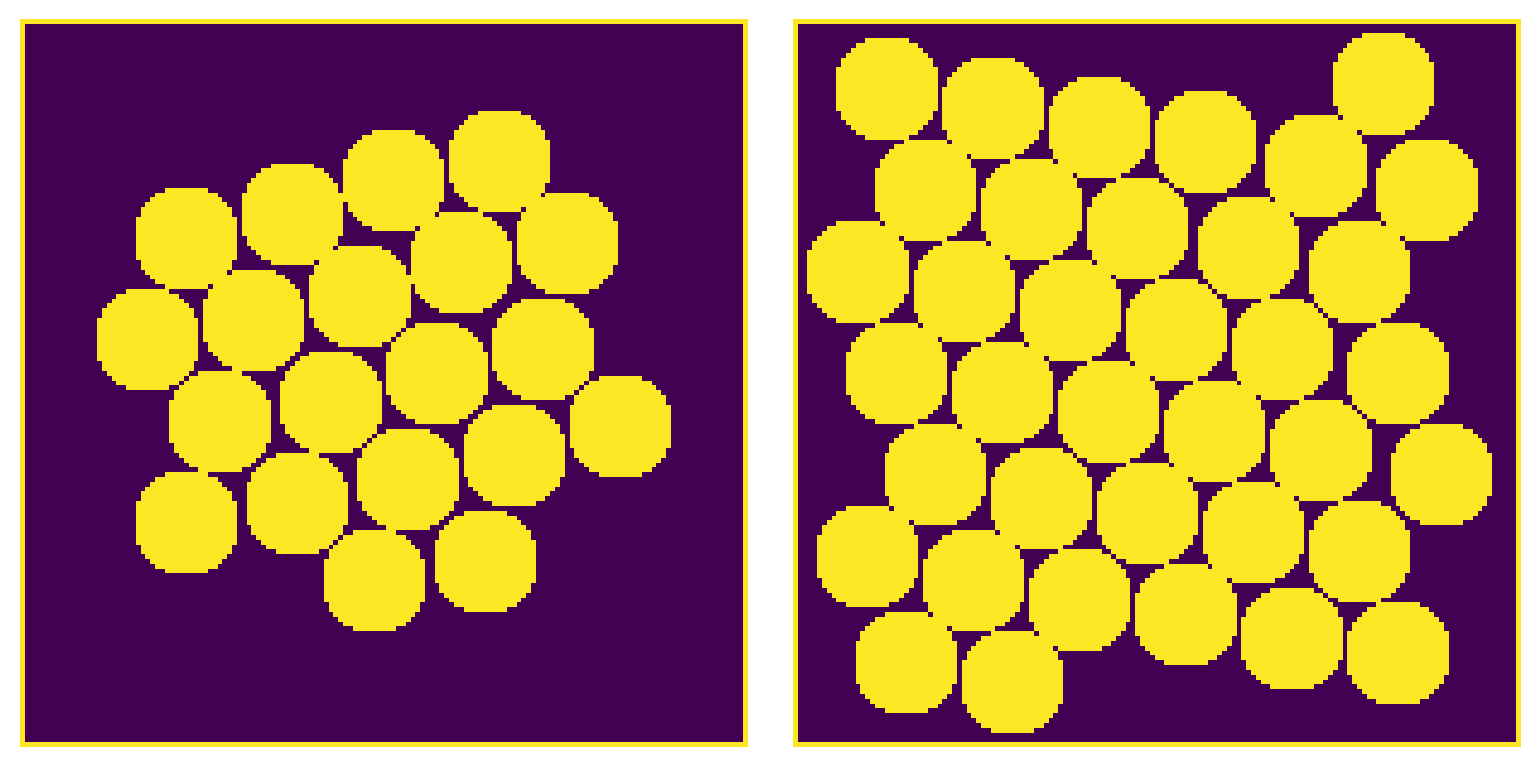

In [9]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, maxiter=20)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)

im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, maxiter=200)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);

# `phi`
The solid volume fraction of the spheres to add, which will override the value of `maxiter`.

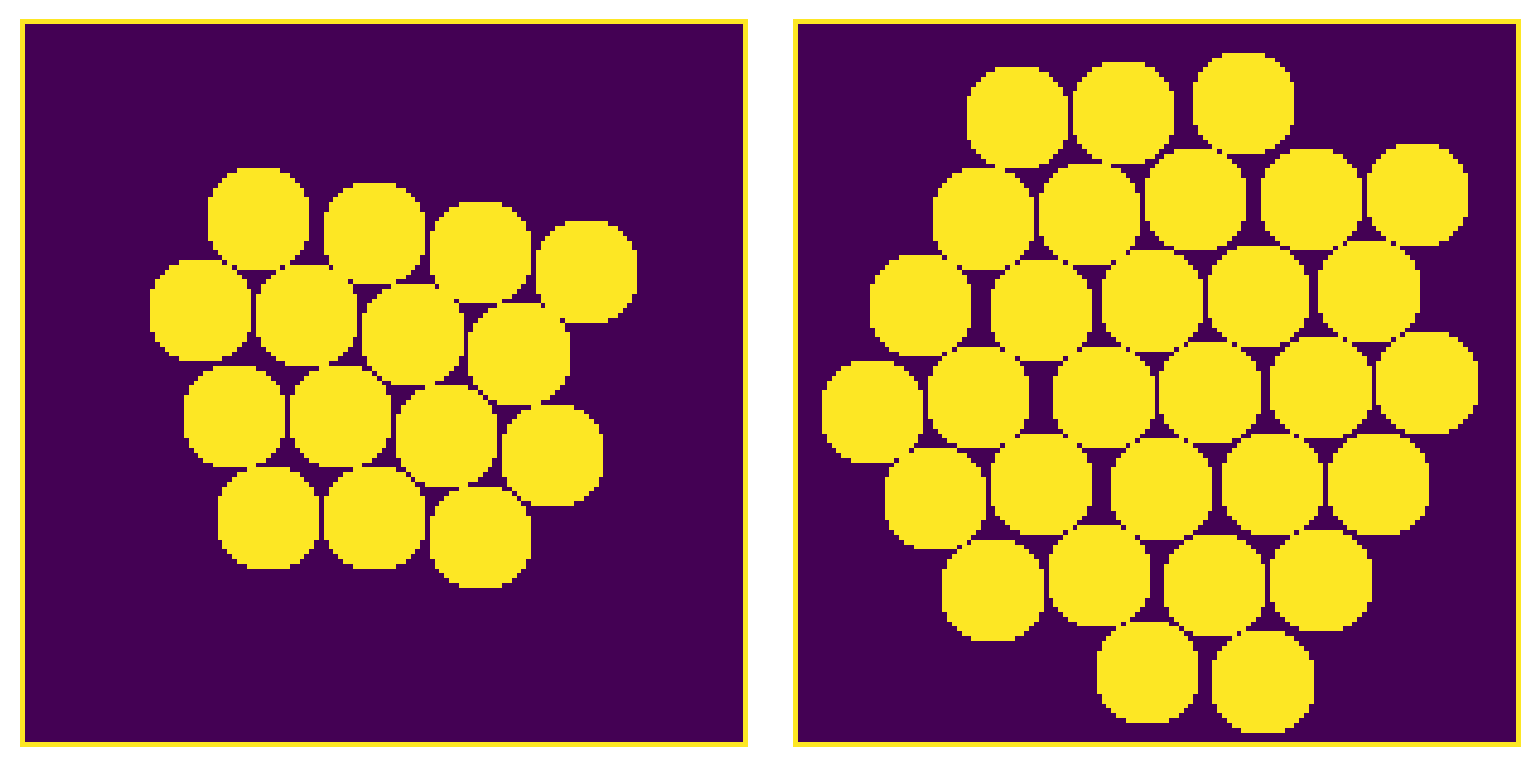

In [10]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, phi=0.25)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)

im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, phi=0.5)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);

## `compactness`
This controls how perfectly or tightly the spheres are clustered together.  The default is 1, which is fully compact, but this sometimes creates unnatural looking groupings so a value < 1.0 might be helpful.

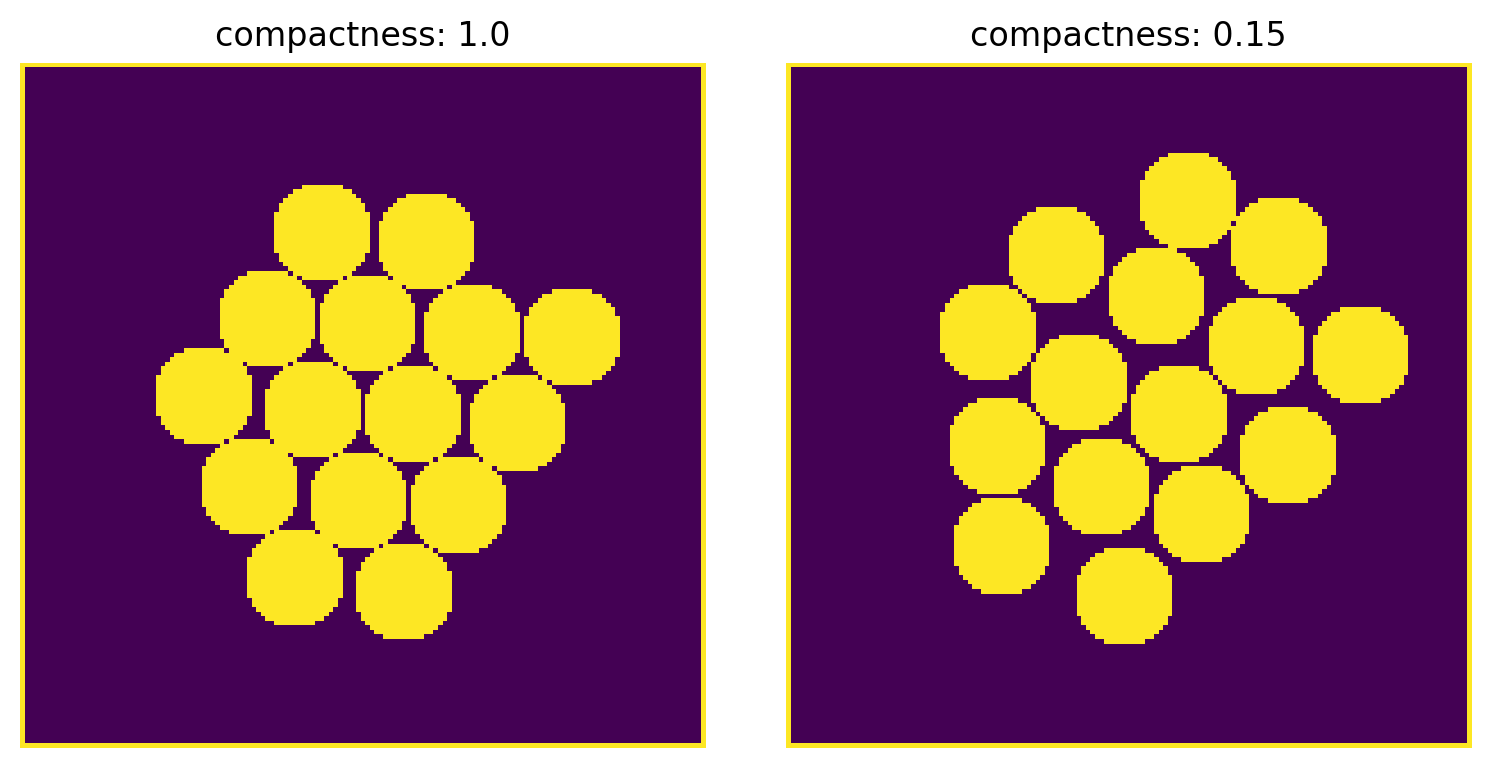

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

compactness = 1.0
im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, phi=0.25, compactness=compactness)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].set_title(f"compactness: {compactness}")
ax[0].axis(False)

compactness = 0.15
im = ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, phi=0.25, compactness=compactness)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].set_title(f"compactness: {compactness}")
ax[1].axis(False);